# Foursquare

In [2]:
# imports
import pandas as pd
import requests
import os
import json
API_KEY=os.getenv("FOURSQUARE_API_KEY")


# Citybike DataFrame for using the stations to make API request to both foursquare and YELP

In [4]:
df_citybike = pd.read_csv('C:/users/simon/Citybike.csv')
print(df_citybike)

                       Station Name   Latitude  Longitude  Number_of_Bikes
0                      Hess at king  43.259126 -79.877212               12
1                     Bayfront Park  43.269288 -79.871327                2
2                   Bay at Strachan  43.267859 -79.867923                7
3                   Bay at Mulberry  43.263198 -79.871803                3
4                         City Hall  43.256132 -79.874499                8
..                              ...        ...        ...              ...
139  Westinghouse at Barton - ERI13  43.258319 -79.842406                4
140              James at Colbourne  43.263777 -79.866042                2
141                Main at Longwood  43.259604 -79.902103                4
142                     Van Wagners  43.260008 -79.766388                6
143           King William at James  43.257635 -79.868487                4

[144 rows x 4 columns]


Send a request to Foursquare with a small radius (1000m) for all the bike stations in your city of choice. 

In [5]:
API_KEY=os.getenv("FOURSQUARE_API_KEY")

responses_dict = {}

for idx in df_citybike.index:
   
    url = 'https://api.foursquare.com/v3/places/search?sort=RATING'
    params = {
        'query': 'bar,restaurant, school',
        'radius': '1000',
        'll': f"{df_citybike.loc[idx,'Latitude']},{df_citybike.loc[idx,'Longitude']}",
    }
    headers = {
        'Authorization': API_KEY,
        'Accept': 'application/json'
    }

    response = requests.get(url, params=params, headers=headers)
   
    responses_dict[idx]= response.json()

Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [6]:

lat = []
lon = []
name = []
distance =[]
#print(responses_dict[1]['results'][0]['geocodes']['main']['latitude'])
#print(responses_dict[15]['results'][0]['categories'][0]['name'])
for x in responses_dict:
    # print(responses_dict[x]['results'][0]['categories'][0]['name'])
    if x > 108:
        break
    lon.append(responses_dict[x]['results'][0]['geocodes']['main']['longitude'])
    lat.append(responses_dict[x]['results'][0]['geocodes']['main']['latitude'])
    name.append(responses_dict[x]['results'][0]['categories'][0]['name'])
    distance.append(responses_dict[x]['results'][0]['distance'])
   


Put your parsed results into a DataFrame

In [7]:
df_foursquare = pd.DataFrame({
    "Name":name,
    "Longitude":lon,
    "Latitude":lat,
    "Distance":distance
})
    
df_foursquare.head(10)

#df_foursquare.to_csv('C:/users/simon/foursquare.csv', index=False)

,Name,Longitude,Latitude,Distance
0,Bar,-79.866884,43.260862,840
1,Bar,-79.866249,43.262589,849
2,Bar,-79.866884,43.260862,768
3,Bar,-79.866884,43.260862,452
4,Bar,-79.866884,43.260862,802
5,Bakery,-79.886945,43.252827,943
6,American Restaurant,-79.872017,43.251462,242
7,Bar,-79.866884,43.260862,950
8,Bar,-79.866884,43.260862,853
9,Bar,-79.866884,43.260862,954


# Yelp

Send a request to Yelp with a small radius (1000m) for all the bike stations in your city of choice. 

In [9]:
API_KEY=os.getenv("YELP_API_KEY")

parsed_data=[]
for idx in df_citybike.index:

    request_url= 'https://api.yelp.com/v3/businesses/search'
    params = {
        'location': 'Hamilton, Canada',
        'categories': ['bar, restaurant','grocery'],
        'radius': '1000',
        'll': f"{df_citybike.loc[idx,'Latitude']},{df_citybike.loc[idx,'Longitude']}",
    }
    headers = {
        'Authorization': 'Bearer '+ API_KEY,
        'Accept': 'application/json'
    }

    response = requests.get(request_url,params, headers = headers)
    result = response.json()
    

    parsed_data.append(result)
   # print(parsed_data)

##Parse through the response to get the POI (such as restaurants, bars, etc) details you want (ratings, name, location, etc)

In [6]:
POI_names = []
latitudes = []
longitudes = []
ratings = []
print(parsed_data)
for i in range(len(parsed_data)):
    POI_names.append(parsed_data[i]['businesses'][0]["name"])
    latitudes.append(parsed_data[i]['businesses'][0]["coordinates"]["latitude"])
    longitudes.append(parsed_data[i]['businesses'][0]["coordinates"]["longitude"])
    ratings.append(parsed_data[i]['businesses'][0]["rating"])

[{'businesses': [{'id': 'zn_j2HWuf9iNzzvyAmIigw', 'alias': 'fortinos-hamilton', 'name': 'Fortinos', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/Ymr711CtGe0Fwl5_uoqqBA/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/fortinos-hamilton?adjust_creative=cFOpev7TfyJrFlvmddAf9w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=cFOpev7TfyJrFlvmddAf9w', 'review_count': 9, 'categories': [{'alias': 'grocery', 'title': 'Grocery'}], 'rating': 3.5, 'coordinates': {'latitude': 43.2573352, 'longitude': -79.928813}, 'transactions': [], 'price': '$$', 'location': {'address1': '1579 Main Street W', 'address2': '', 'address3': '', 'city': 'Hamilton', 'zip_code': 'L8S 1E6', 'country': 'CA', 'state': 'ON', 'display_address': ['1579 Main Street W', 'Hamilton, ON L8S 1E6', 'Canada']}, 'phone': '+19053089045', 'display_phone': '+1 905-308-9045', 'distance': 852.7085013351345}, {'id': 'c2soT59x9jorDBqc2y-cHw', 'alias': 'm-and-m-food-market-dundas', 'name': 'M&M Food Ma

Put your parsed results into a DataFrame

In [7]:
df_yelp = pd.DataFrame({
    "Name": POI_names,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Rating": ratings
})

print(df_yelp)

         Name   Latitude  Longitude  Rating
0    Fortinos  43.257335 -79.928813     3.5
1    Fortinos  43.257335 -79.928813     3.5
2    Fortinos  43.257335 -79.928813     3.5
3    Fortinos  43.257335 -79.928813     3.5
4    Fortinos  43.257335 -79.928813     3.5
..        ...        ...        ...     ...
139  Fortinos  43.257335 -79.928813     3.5
140  Fortinos  43.257335 -79.928813     3.5
141  Fortinos  43.257335 -79.928813     3.5
142  Fortinos  43.257335 -79.928813     3.5
143  Fortinos  43.257335 -79.928813     3.5

[144 rows x 4 columns]


# Comparing Results

Which API provided you with more complete data? Provide an explanation. 

The API from foursquare provided better data content. Although the foursquare returned a little bit less rows of data when quried based on the stations on citybike but it has complete data of the all bars, restaurants, groceries within the 1000 radius of the bike stations. The API query to YELP on the other hand has returend a very limited data of basically two groceries. Thus API from foursquare is much more better for doing all the analysis required for the project.

Get the top 10 restaurants according to their rating

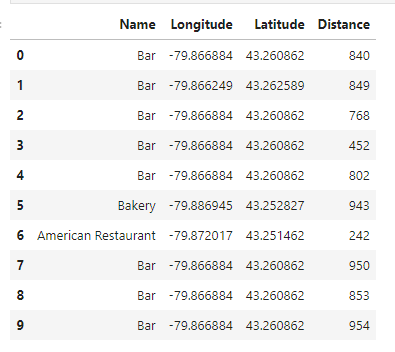